In [1]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in tsv files
ratings_df = pd.read_csv('title.ratings.tsv.gz', delimiter='\t', na_values=['\\N', 'NaN'] )
akas_df = pd.read_csv('title.akas.tsv.gz', delimiter='\t', na_values=['\\N', 'NaN'] ) 
basics_df = pd.read_csv('title.basics.tsv.gz', delimiter='\t', dtype={'runtimeMinutes': 'str'}, na_values=['\\N', 'NaN'] )

In [3]:
#rename titleId to tconst
akas_df = akas_df.rename(columns={'titleId':'tconst'})

In [4]:
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892.0,NaN,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892.0,NaN,NaN,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893.0,NaN,1,"Comedy,Short"


In [5]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713


In [6]:
akas_df.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0.0
1,tt0000001,2,Карменсита,RU,NaN,NaN,NaN,0.0
2,tt0000001,3,Carmencita,US,NaN,NaN,NaN,0.0
3,tt0000001,4,Carmencita,NaN,NaN,original,NaN,1.0
4,tt0000002,1,Le clown et ses chiens,NaN,NaN,original,NaN,1.0


In [7]:
#check for and drop duplicates if any 
ratings_df.drop_duplicates(inplace = True)
basics_df.drop_duplicates(inplace = True)
akas_df.drop_duplicates(inplace=True)

In [8]:
#merge dataframes
merged_df = pd.merge(pd.merge(basics_df, ratings_df ), akas_df)

In [9]:
merged_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short",5.8,1422,1,Carmencita - spanyol tánc,HU,NaN,imdbDisplay,NaN,0.0
1,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short",5.8,1422,2,Карменсита,RU,NaN,NaN,NaN,0.0
2,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short",5.8,1422,3,Carmencita,US,NaN,NaN,NaN,0.0
3,tt0000001,short,Carmencita,Carmencita,0,1894.0,NaN,1,"Documentary,Short",5.8,1422,4,Carmencita,NaN,NaN,original,NaN,1.0
4,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892.0,NaN,5,"Animation,Short",6.4,168,1,Le clown et ses chiens,NaN,NaN,original,NaN,1.0


In [10]:
merged_df.shape

(1686547, 18)

In [11]:
#merge dataframes using an outer merge
merged_outer_df = pd.merge(pd.merge(basics_df, ratings_df, how = 'outer' ), akas_df, how = 'outer' )

In [12]:
merged_outer_df.shape

(6740089, 18)

In [13]:
#Use the unique() method to compute how many different 'titleTypes' there are 
pd.DataFrame(merged_df['titleType'].unique())

,0
0,short
1,movie
2,tvMovie
3,tvSeries
4,tvEpisode
5,tvShort
6,tvMiniSeries
7,tvSpecial
8,video
9,videoGame


In [14]:
#verify result using nunique
merged_df['titleType'].nunique()

10

In [15]:
#filter out specified rows 
df_new = merged_df[((merged_df.language == 'en') | (merged_df.region == 'US')) & (merged_df.titleType == 'movie')]

In [16]:
df_new.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle
51,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45,Romance,5.5,70,3,Miss Jerry,US,NaN,NaN,NaN,0.0
574,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,NaN,20,"Documentary,News,Sport",5.2,266,1,The Corbett-Fitzsimmons Fight,US,NaN,NaN,NaN,0.0
1446,tt0000630,movie,Hamlet,Amleto,0,1908.0,NaN,NaN,Drama,3.1,10,4,Hamlet,US,NaN,NaN,NaN,0.0
1520,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908.0,NaN,120,"Adventure,Fantasy",5.9,26,1,The Fairylogue and Radio-Plays,US,NaN,NaN,NaN,0.0
1797,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910.0,NaN,NaN,Drama,5.2,16,2,"Hamlet, Prince of Denmark",US,NaN,NaN,NaN,0.0


In [30]:
df_new.shape

(160034, 19)

In [17]:
df_new['log10Votes'] = np.log10(df_new['numVotes'])

<ipython-input-17-54e805cf52d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['log10Votes'] = np.log10(df_new['numVotes'])


In [18]:
df_new.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,ordering,title,region,language,types,attributes,isOriginalTitle,log10Votes
51,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894.0,NaN,45,Romance,5.5,70,3,Miss Jerry,US,NaN,NaN,NaN,0.0,1.845098
574,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897.0,NaN,20,"Documentary,News,Sport",5.2,266,1,The Corbett-Fitzsimmons Fight,US,NaN,NaN,NaN,0.0,2.424882
1446,tt0000630,movie,Hamlet,Amleto,0,1908.0,NaN,NaN,Drama,3.1,10,4,Hamlet,US,NaN,NaN,NaN,0.0,1.000000
1520,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908.0,NaN,120,"Adventure,Fantasy",5.9,26,1,The Fairylogue and Radio-Plays,US,NaN,NaN,NaN,0.0,1.414973
1797,tt0000886,movie,"Hamlet, Prince of Denmark",Hamlet,0,1910.0,NaN,NaN,Drama,5.2,16,2,"Hamlet, Prince of Denmark",US,NaN,NaN,NaN,0.0,1.204120


In [19]:
#Lower the case of all text in the 'genres' column
df_new['genres'] = df_new['genres'].str.lower()

<ipython-input-19-4eab0ea4c5bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['genres'] = df_new['genres'].str.lower()


In [20]:
#Using Groupby on genres using log10Votes
df_new.groupby('genres', sort=False)['log10Votes'].mean().nlargest(10)

In [21]:
#Using Groupby on genres using averageRatings
df_new.groupby('genres', sort=False)['averageRating'].mean().nlargest(10)

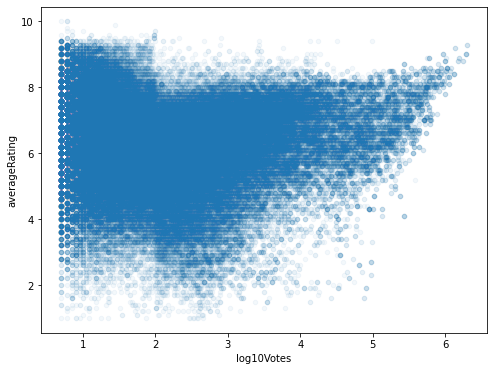

In [33]:
#Using ‘groupby’ group all data by averageRating and make a scatter plot of averageRating vs log10Votes. 

fig, ax = plt.subplots(figsize=(8,6))

df_new.groupby('averageRating').plot(kind='scatter', x = "log10Votes", y = "averageRating", ax=ax, alpha = 1/20)

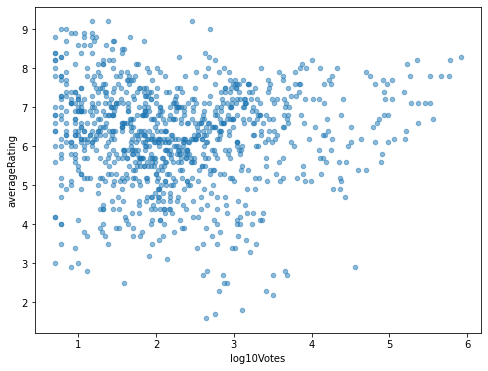

In [36]:
#sampled data and introduced transparency to minimize overplotting
fig, ax = plt.subplots(figsize=(8,6))
df_sample = df_new.sample(1000)
df_sample.groupby('averageRating').plot(kind='scatter', x = "log10Votes", y = "averageRating", ax=ax, alpha = 1/2)

In [55]:
from scipy import stats

#peform linear regression on data using scipy
res = stats.linregress(df_new['log10Votes'], df_new['averageRating'])
print(f"R-squared: {res.rvalue**2:.6f}")
print(f"Slope: {res.slope:.6f}")
print(f"Intercept: {res.intercept:.6f}")

R-squared: 0.000929
Slope: 0.035826
Intercept: 6.158476


In [54]:
print(res.slope)

0.035825773459013825


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

#perform linear regression using sklearn
X = df_new['log10Votes'].values.reshape(-1,1)
y = df_new['averageRating'].values.reshape(-1,1)

In [59]:
regressor = LinearRegression()
regressor.fit(X,y)
print(f"R-squared:{regressor.score(X,y):.6f}")
print(regressor.coef_[0])
print(f"Intercept:{regressor.intercept_[0]:.6f}")

R-squared:0.000929
[0.03582577]
Intercept:6.158476


In [35]:
import torch
import torch.nn as nn
from torch.autograd import Variable

X_val = torch.tensor(df_new[['log10Votes']].values, dtype=torch.float32)
y_val = torch.tensor(df_new[['averageRating']].values, dtype=torch.float32)

in_features = 1 # number of independent variables
out_features = 1 # dimension of predicted variables
#create regression model
reg_model = torch.nn.Linear(in_features=in_features, out_features=out_features, bias=True)
#loss function
mse_loss = torch.nn.MSELoss()

learning_rate = 0.01
optimizer = torch.optim.SGD(reg_model.parameters(), lr=learning_rate)

n_epoch = 6000
for i in range(n_epoch):
    # predict model with current regression parameters
    # forward pass (feed the data to model)
    y_pred = reg_model(X_val)
    # calculate loss function
    step_loss = mse_loss(y_pred, y_val)
        
    # Backward to find the derivatives of the loss function with respect to regression parameters
    # make any stored gradients to zero
    # backward pass (go back and update the regression parameters to minimize the loss)
    optimizer.zero_grad()
    step_loss.backward()
    # update with current step regression parameters 
    optimizer.step()
    print ('epoch [{}], Loss: {:.2f}'.format(i, step_loss.item()))


epoch [0], Loss: 38.00
epoch [1], Loss: 29.59
epoch [2], Loss: 23.39
epoch [3], Loss: 18.82
epoch [4], Loss: 15.45
epoch [5], Loss: 12.97
epoch [6], Loss: 11.13
epoch [7], Loss: 9.77
epoch [8], Loss: 8.76
epoch [9], Loss: 8.01
epoch [10], Loss: 7.45
epoch [11], Loss: 7.03
epoch [12], Loss: 6.72
epoch [13], Loss: 6.48
epoch [14], Loss: 6.29
epoch [15], Loss: 6.15
epoch [16], Loss: 6.04
epoch [17], Loss: 5.95
epoch [18], Loss: 5.88
epoch [19], Loss: 5.82
epoch [20], Loss: 5.76
epoch [21], Loss: 5.72
epoch [22], Loss: 5.68
epoch [23], Loss: 5.64
epoch [24], Loss: 5.61
epoch [25], Loss: 5.58
epoch [26], Loss: 5.55
epoch [27], Loss: 5.52
epoch [28], Loss: 5.49
epoch [29], Loss: 5.46
epoch [30], Loss: 5.43
epoch [31], Loss: 5.41
epoch [32], Loss: 5.38
epoch [33], Loss: 5.36
epoch [34], Loss: 5.33
epoch [35], Loss: 5.31
epoch [36], Loss: 5.28
epoch [37], Loss: 5.26
epoch [38], Loss: 5.23
epoch [39], Loss: 5.21
epoch [40], Loss: 5.19
epoch [41], Loss: 5.16
epoch [42], Loss: 5.14
epoch [43], Lo

In [36]:
from sklearn.metrics import r2_score
r2_score(y_true=y_val, y_pred=y_pred.detach().numpy())



0.0009291664479794681